In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from helperfun import plot_decision_boundary

2024-06-27 19:06:14.709131: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-27 19:06:14.709615: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 19:06:14.713443: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 19:06:14.752424: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 19:06:15.417005: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

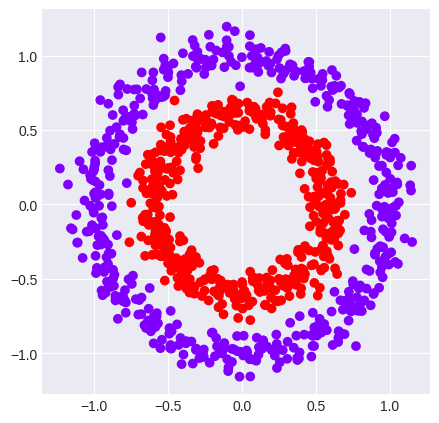

In [2]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, noise=0.07, factor=0.6)

plt.style.use("seaborn-v0_8-darkgrid")
plt.figure(figsize=(5, 5))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap="rainbow")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [3]:
circles_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

circles_model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

history = circles_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5247 - loss: 0.6754 
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5692 - loss: 0.6292 
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8324 - loss: 0.5792 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9157 - loss: 0.5337 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9410 - loss: 0.4820 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9681 - loss: 0.4103 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9776 - loss: 0.3631 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.9763 - loss: 0.3020
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.9916 - loss: 0.2557
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9896 - loss: 0.2139 


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step


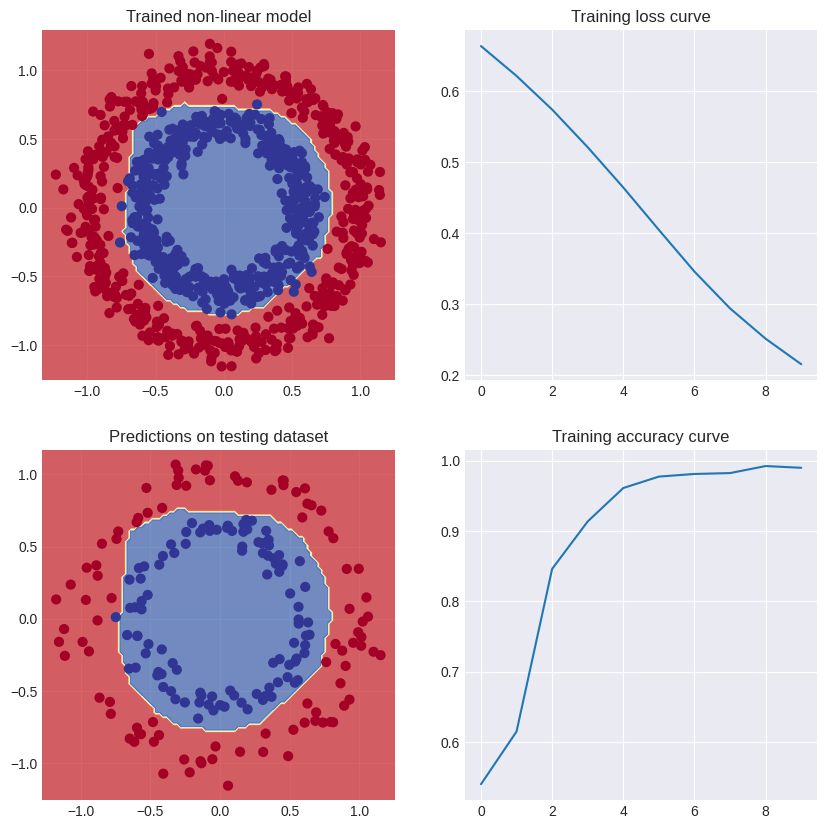

In [4]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title("Trained non-linear model")
plot_decision_boundary(circles_model, X, y)

plt.subplot(2, 2, 2)
plt.title("Training loss curve")
plt.plot(history.history["loss"])

plt.subplot(2, 2, 3)
plt.title("Predictions on testing dataset")
plot_decision_boundary(circles_model, X_test, y_test)

plt.subplot(2, 2, 4)
plt.title("Training accuracy curve")
plt.plot(history.history["accuracy"])